In [19]:
conda install seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# The Sparks Foundation - TASK 1
To Predict the percentage of a student based on the number of hours studied.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [5]:
#reading the data
data = pd.read_csv ('http://bit.ly/w-data')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


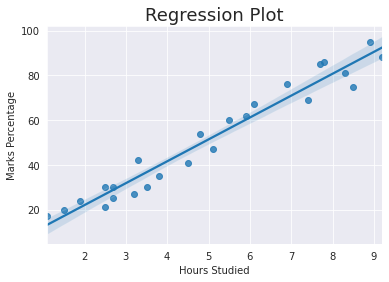

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
sns.regplot(y= data['Scores'], x= data['Hours'])
plt.title('Regression Plot',size=18)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()
print(data.corr())

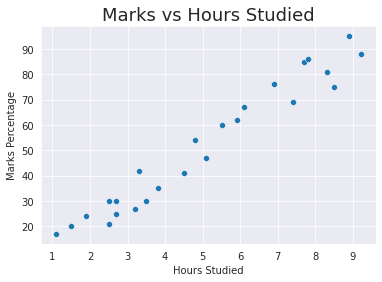

In [24]:
sns.set_style('darkgrid')
sns.scatterplot(x= data['Hours'], y= data['Scores'])
plt.title('Marks vs Hours Studied',size=18)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()

#### There appears to be a positive correlation between the Marks Percentage and Hours studied. 

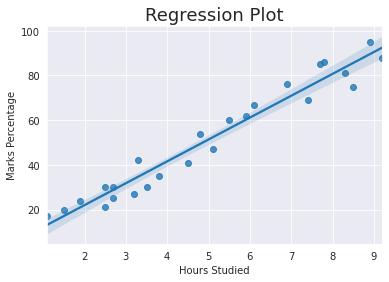

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [17]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=18)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()
print(data.corr())

#### The regression plot confirms the positive correlation between the Marks Percentage and the Hours Studied.

## Training the Model 

### 1. Splitting the Data

In [9]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 2. Fitting the data into the model 

In [21]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("-----Model Trained-----")

-----Model Trained-----


## Predicting the Marks Percentage 

In [11]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## To Compare the Predicted Marks with the Atcual Marks 

In [12]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Plotting the Predicted Marks with the Actual Marks

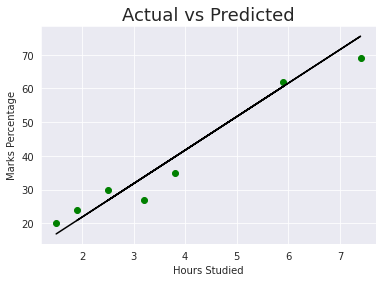

In [23]:
plt.scatter(x=val_X, y=val_y, color='green')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=18)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()

## To Find the Predicted Score of a Student if they Study for 9.25 hours per day

In [14]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


#### A Student who Studies for 9.25 Hours a day, is likely to score 93.893

### Calculating the accuracy of the model 

In [15]:
# To calculate the accuracy of the model 
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482
